## Relationship between R Square and Learning Curve

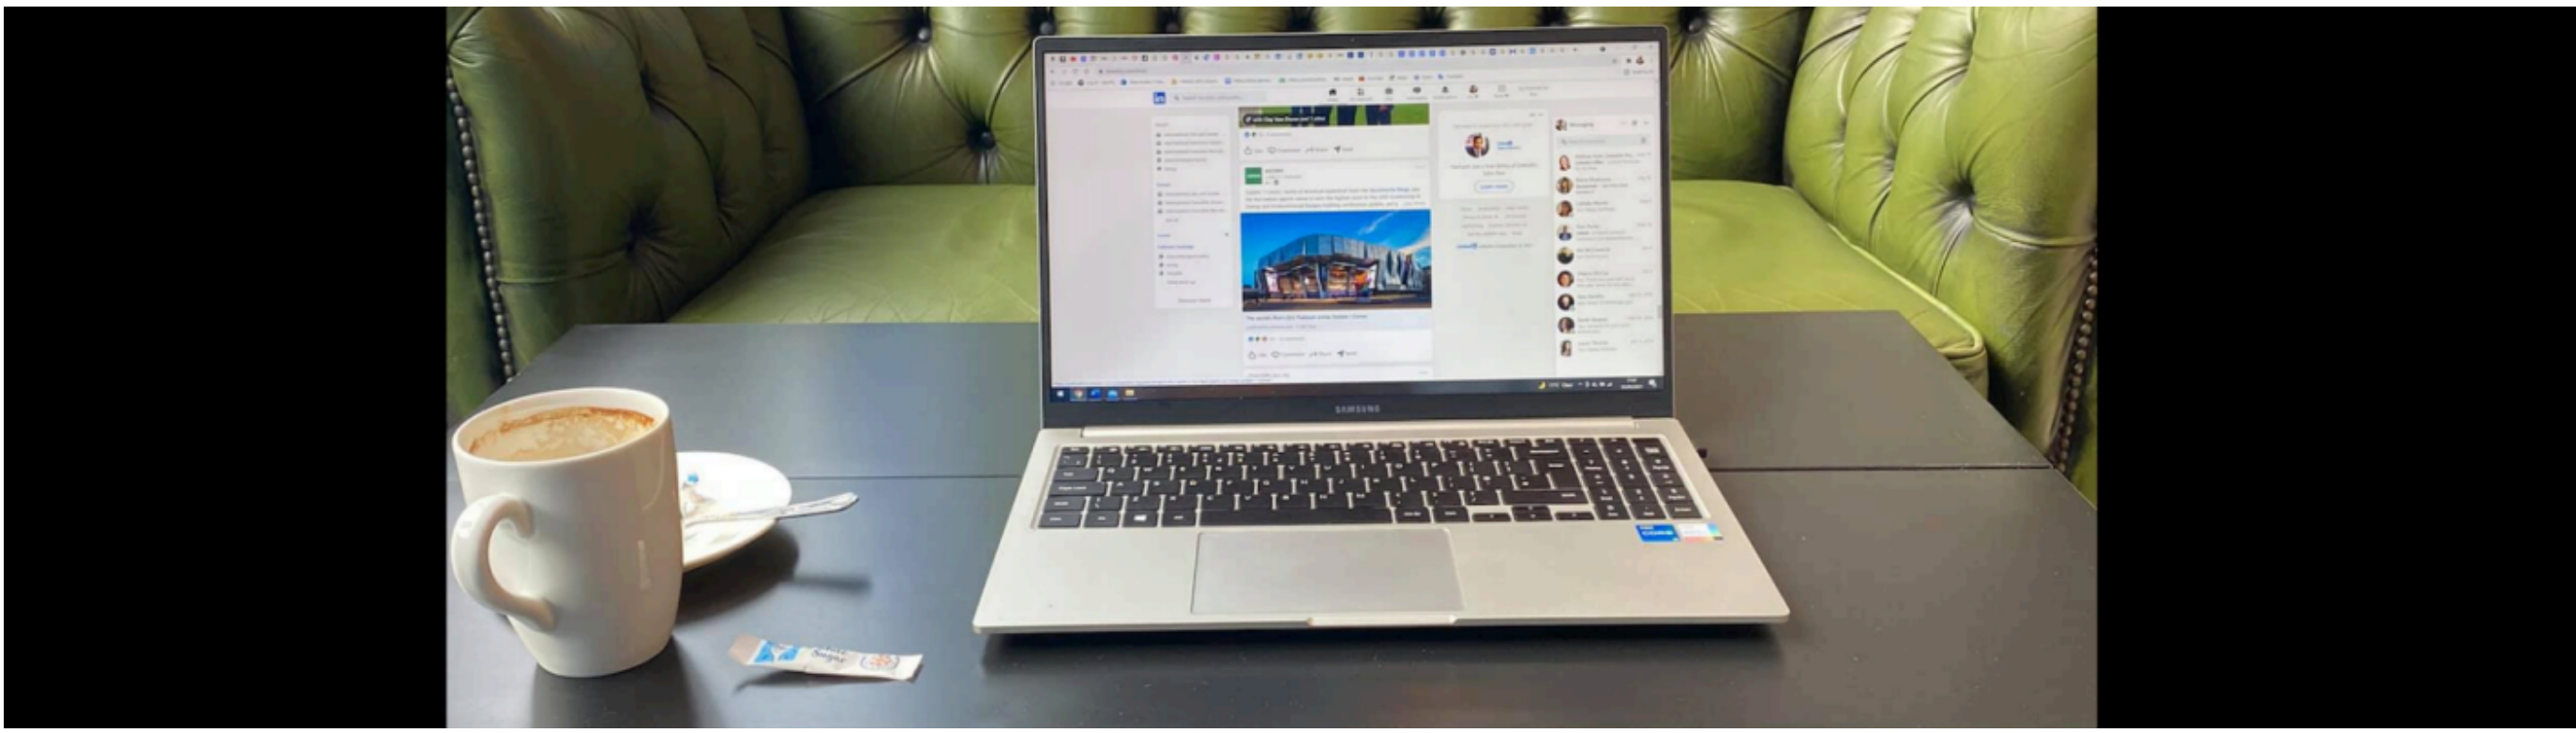

### HEMANT THAPA

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns

In [27]:
from keras.models import Sequential
from keras.layers import Dense, Activation
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score

### DATASET

In [3]:
x = [3478.729980, 3484.550049, 3508.010010, 
     3500.310059, 3526.649902, 3580.840088, 
     3455.060059, 3426.959961, 3331.840088, 3398.959961]

y = [126.522499, 125.010002, 124.807503, 
     129.039993, 134.179993, 131.399994, 120.879997, 
     120.959999, 112.820000, 117.320000]

In [4]:
dataset = {"x":x, "y":y}
x_data = np.array(dataset['x'])
y_data = np.array(dataset['y'])

### NORMALISATION 

In [5]:
x_scaled = (x_data - x_data.mean())/x_data.std()
y_scaled = (y_data - y_data.mean())/y_data.std()

In [6]:
x_scaled

array([ 0.14323663,  0.23063051,  0.58290416,  0.46728206,  0.86279988,
        1.67651712, -0.21218977, -0.63413949, -2.06245495, -1.05458615])

In [7]:
y_scaled

array([ 0.3617223 ,  0.1162192 ,  0.08335029,  0.7703529 ,  1.60465928,
        1.15341981, -0.55414841, -0.54116277, -1.86241824, -1.13199436])

### INITIALISATION OF VARIABLE 

In [8]:
w = 0.5
b = 0.5
alpha = 0.01
iteration = 1000

### GRADIENT DESCENT OPTIMISATION 

In [9]:
w_history = [w]
b_history = [b]
dw_history = []
db_history = []
r2_scores = []

In [10]:
for i in range(iteration):
    # Forward pass
    y_pred_normalised = w * x_scaled + b
    
    # Compute gradients
    dw = (2/len(x_scaled)) * np.sum((y_pred_normalised - y_scaled) * x_scaled)
    db = (2/len(x_scaled)) * np.sum(y_pred_normalised - y_scaled)
    
    # Update parameters
    w -= alpha * dw
    b -= alpha * db
    
    # Calculate R-squared using scaled data
    y_pred_scaled = w * x_scaled + b
    r2 = r2_score(y_scaled, y_pred_scaled)
    r2_scores.append(r2)
    
    w_history.append(w)
    b_history.append(b)
    dw_history.append(dw)
    db_history.append(db)
    
    if i >= iteration - 1:
        break

### R SQUARE THROUGH ITERATION 

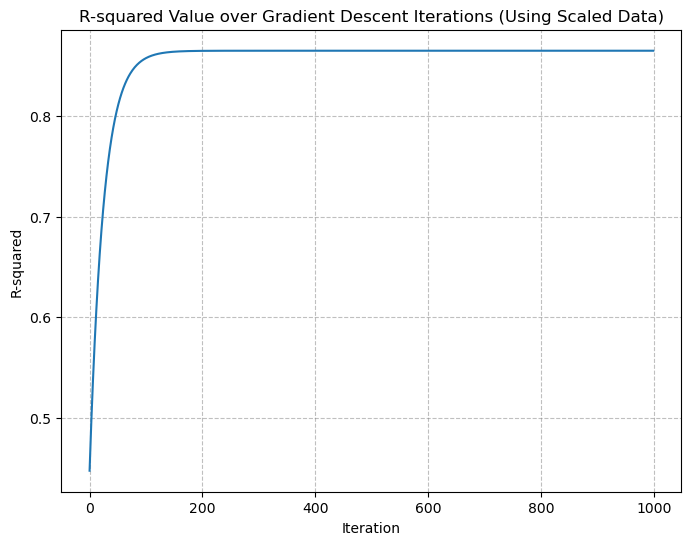

In [11]:
plt.figure(figsize=(8, 6))
plt.plot(range(iteration), r2_scores)
plt.xlabel('Iteration')
plt.ylabel('R-squared')
plt.title('R-squared Value over Gradient Descent Iterations (Using Scaled Data)')
plt.grid(True, linestyle="--", color="grey", alpha=0.5)
plt.show()

In [12]:
w

0.9301097393798106

In [13]:
b

8.414821147158245e-10

In [14]:
alpha_weight_original_scale = (y_data.std())/(x_data.std())*w

In [15]:
slope = alpha_weight_original_scale
slope

0.08604479796919567

In [16]:
intercept = y_data.mean() - slope * x_data.mean()
intercept

-174.21184206245522

In [17]:
y_pred_original_scale = w * x_data + b

In [18]:
y_pred_original_scale

array([3235.60063507, 3241.01393793, 3262.83427614, 3255.67247673,
       3280.17142123, 3330.57424101, 3213.58501102, 3187.44883619,
       3098.97691591, 3161.40576349])

In [19]:
x_fit = np.linspace(min(x_data), max(x_data), 100)
y_fit = slope * x_fit + intercept

### OPTIMISATION 

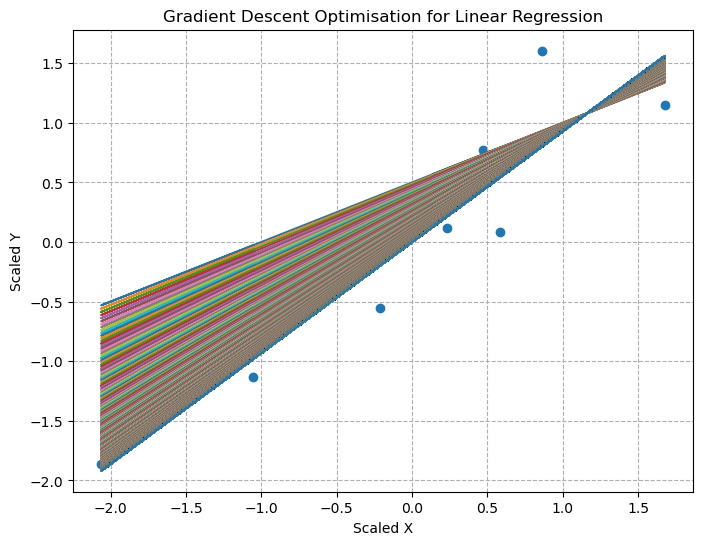

In [20]:
plt.figure(figsize=(8, 6))
plt.scatter(x_scaled, y_scaled, label='Data Points')
for i in range(len(w_history)):
    y_pred = w_history[i] * x_scaled + b_history[i]
    plt.plot(x_scaled, y_pred, label=f'Iteration {i+1}')

plt.xlabel('Scaled X')
plt.ylabel('Scaled Y')
plt.title('Gradient Descent Optimisation for Linear Regression')
plt.grid(True, linestyle="--")
plt.show()

### BEST FIT LINE

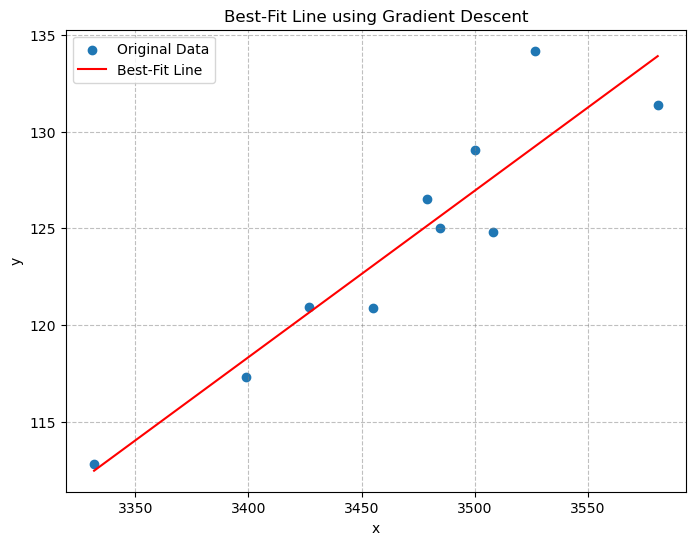

In [21]:
plt.figure(figsize=(8, 6))
plt.scatter(x_data, y_data, label='Original Data')
plt.plot(x_fit, y_fit, color='red', label='Best-Fit Line')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Best-Fit Line using Gradient Descent')
plt.legend()
plt.grid(True, linestyle="--", color="grey", alpha=0.5)
plt.show()

### DERIVATIVE OF W

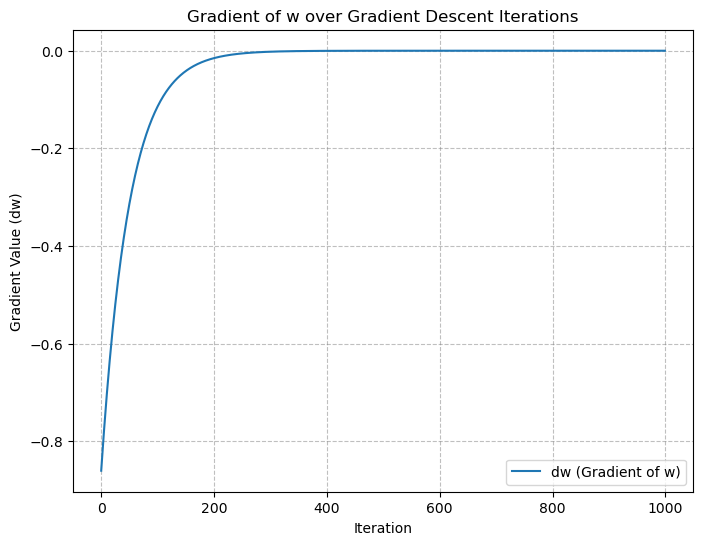

In [22]:
plt.figure(figsize=(8, 6))
plt.plot(range(iteration), dw_history, label='dw (Gradient of w)')
plt.xlabel('Iteration')
plt.ylabel('Gradient Value (dw)')
plt.title('Gradient of w over Gradient Descent Iterations')
plt.legend()
plt.grid(True, linestyle="--", color="grey", alpha=0.5)
plt.show()

### DERIVATIVE OF B

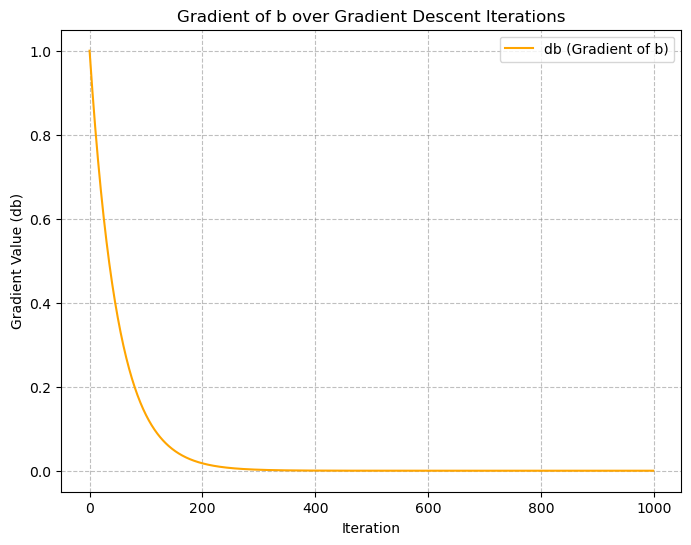

In [23]:
plt.figure(figsize=(8, 6))
plt.plot(range(iteration), db_history,color="orange", label='db (Gradient of b)')
plt.xlabel('Iteration')
plt.ylabel('Gradient Value (db)')
plt.title('Gradient of b over Gradient Descent Iterations')
plt.legend()
plt.grid(True, linestyle="--", color="grey", alpha=0.5)
plt.show()

### DERIVATIVES

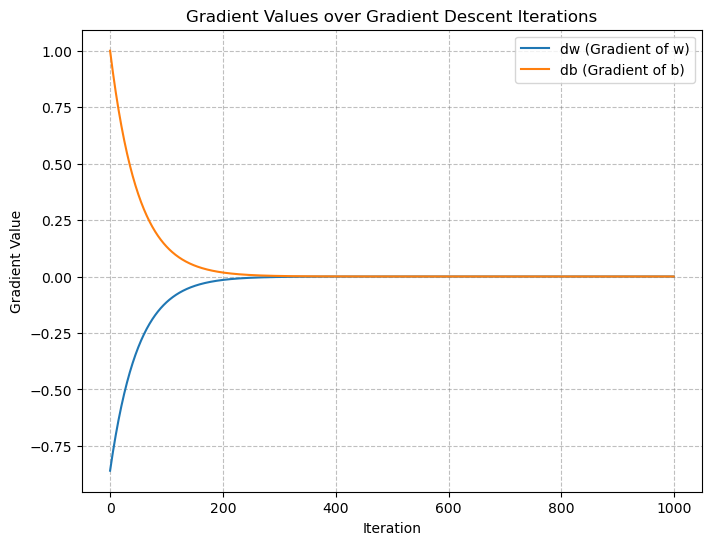

In [24]:
plt.figure(figsize=(8, 6))
plt.plot(range(iteration), dw_history, label='dw (Gradient of w)')
plt.plot(range(iteration), db_history, label='db (Gradient of b)')
plt.xlabel('Iteration')
plt.ylabel('Gradient Value')
plt.title('Gradient Values over Gradient Descent Iterations')
plt.legend()
plt.grid(True, linestyle="--", color="grey", alpha=0.5)
plt.show()